# Essentials

In [1]:
import sys
sys.path.append("../")

In [5]:
!ls ..

bin		  crypto_deltalake.log	__pycache__	README.md  tables
crypto_deltalake  notebooks		pyproject.toml	ruff.toml  uv.lock


In [13]:
import polars as pl
import deltalake
from crypto_deltalake.config import TABLE_LIQUIDATION_PATH

In [45]:
import seaborn as sns

# Read data

In [21]:
df = pl.scan_delta(f"../{TABLE_LIQUIDATION_PATH}")

display(df.filter(pl.col("symbol") == "BTCUSDT").sort("time"))
df.filter(pl.col("symbol") == "BTCUSDT").sort("time").collect()

time,symbol,side,original_quantity,price,avg_price,status,last_filled_quantity,filled_accum_quantity
datetime[μs],str,str,f64,f64,f64,str,f64,f64
2025-04-19 19:10:24,"""BTCUSDT""","""SELL""",0.004,84481.34,84819.9,null,null,null
2025-04-19 19:18:45,"""BTCUSDT""","""BUY""",0.017,85286.13,84960.0,null,null,null
2025-04-19 20:31:29,"""BTCUSDT""","""BUY""",0.087,85578.51,85238.0,null,null,null
2025-04-19 20:34:39,"""BTCUSDT""","""BUY""",0.015,85604.2,85265.0,null,null,null
2025-04-19 20:35:08,"""BTCUSDT""","""BUY""",0.043,85606.1,85270.4,null,null,null
…,…,…,…,…,…,…,…,…
2025-04-20 16:59:11,"""BTCUSDT""","""SELL""",0.591,84269.33,84584.5,"""FILLED""",0.591,0.591
2025-04-20 16:59:14,"""BTCUSDT""","""BUY""",0.002,84909.19,84584.6,"""FILLED""",0.002,0.002
2025-04-20 17:03:04,"""BTCUSDT""","""SELL""",0.015,84217.98,84542.7,"""FILLED""",0.007,0.015


In [31]:
df = pl.read_delta(f"../{TABLE_LIQUIDATION_PATH}")

# Analyze

In [40]:
df = df.with_columns(
    (pl.col("price") * pl.col("filled_accum_quantity")).alias("usd_amount")
)

In [42]:
df["usd_amount"].describe()

statistic,value
str,f64
"""count""",4704.0
"""null_count""",14165.0
"""mean""",1483.696187
"""std""",8166.765785
"""min""",0.001302
"""25%""",41.460955
"""50%""",194.6217
"""75%""",813.103784
"""max""",303348.0


In [51]:
df.filter(pl.col("usd_amount") >= 10_000).select("usd_amount").describe()

statistic,usd_amount
str,f64
"""count""",89.0
"""null_count""",0.0
"""mean""",36270.155374
"""std""",46810.214733
"""min""",10025.767664
"""25%""",13764.526776
"""50%""",18970.38
"""75%""",38831.131241
"""max""",303348.0


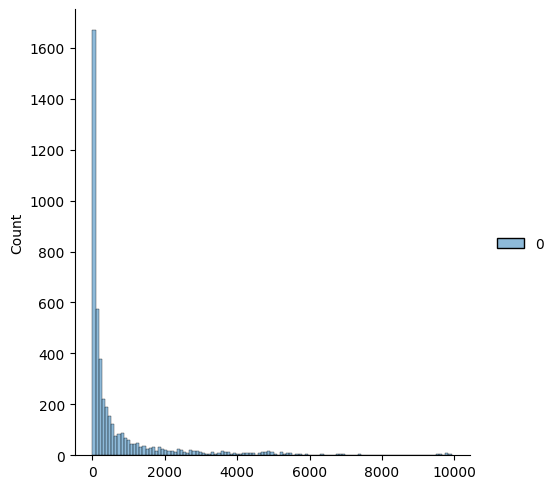

In [49]:
sns.displot(df.filter(pl.col("usd_amount") < 10_000).select("usd_amount"))

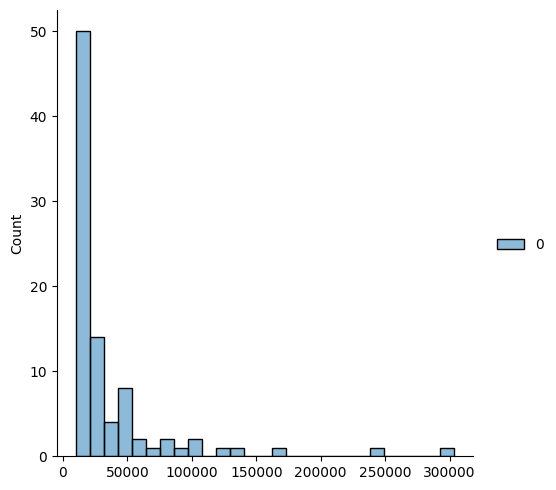

In [52]:
sns.displot(df.filter(pl.col("usd_amount") >= 10_000).select("usd_amount"))

In [58]:
df.filter(pl.col("usd_amount") >= 10_000).group_by(["symbol", "side"]).len().filter(pl.col("len") > 2).sort("len", descending=True)

symbol,side,len
str,str,u32
"""BTCUSDT""","""SELL""",15
"""ETHUSDT""","""SELL""",12
"""BTCUSDC""","""SELL""",6
"""DOGEUSDT""","""SELL""",5
"""1000PEPEUSDT""","""SELL""",4
"""BROCCOLIF3BUSDT""","""BUY""",3
"""SUIUSDT""","""SELL""",3
"""SOLUSDT""","""SELL""",3
"""ETHUSDC""","""SELL""",3
